In [1]:
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model

# Load GPT-2 for text generation
text_generator = pipeline("text-generation", model="gpt2")

# Load pre-trained GAN model for image generation
gan_model = load_model("gan_model.h5")

def generate_story_with_images(prompt):
    # Generate text using GPT-2
    generated_text = text_generator(prompt, max_length=100, num_return_sequences=1)[0]['generated_text']

    # Generate image using GAN model
    generated_image = generate_image_with_gan(prompt)

    return generated_text, generated_image

def generate_image_with_gan(prompt):
    # Generate image using GAN model
    generated_image = gan_model.predict(np.random.normal(0, 1, (1, latent_dim)))[0]

    # Convert image array to PIL image
    generated_image = Image.fromarray((generated_image * 255).astype(np.uint8))

    return generated_image

def main():
    print("Welcome to Generative Storytelling AI!")
    print("Enter your prompt to start generating a story, or type 'exit' to quit.")

    while True:
        prompt = input("Enter your prompt: ")

        if prompt.lower() == 'exit':
            print("Exiting...")
            break

        generated_text, generated_image = generate_story_with_images(prompt)

        print("\nGenerated Text:")
        print(generated_text)

        print("\nGenerated Image:")
        plt.imshow(generated_image)
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    main()


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

OSError: No file or directory found at gan_model.h5

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

# Load MNIST dataset
(X_train, _), (_, _) = mnist.load_data()

# Preprocess the data
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1)

# Define the generator model
generator = Sequential([
    Dense(128, input_shape=(100,)),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(784, activation='tanh'),
    Reshape((28, 28, 1))
])

# Define the discriminator model
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Combined model (stack generator on discriminator)
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
gan_model = Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training function
def train(epochs, batch_size=128, sample_interval=50):
    for epoch in range(epochs):
        # Select a random batch of images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan_model.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print progress
        if epoch % sample_interval == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

            # Save generated images
            save_images(epoch)

# Function to save generated images
def save_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale images 0-1

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    plt.close()

# Train the GAN
train(epochs=600, batch_size=32, sample_interval=200)

# Save the trained GAN model to an .h5 file
gan_model.save("gan_model.h5")


1/1 [==============================] - 0s 177ms/step
Epoch 0, D Loss: 0.4162348657846451, G Loss: 0.8188835382461548
1/1 [==============================] - 0s 42ms/step
Epoch 200, D Loss: 0.54848812520504, G Loss: 0.7672289609909058
1/1 [==============================] - 0s 25ms/step
Epoch 400, D Loss: 0.6684769690036774, G Loss: 1.2478939294815063
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Welcome to Generative Storytelling AI!
Enter your prompt to start generating a story, or type 'exit' to quit.


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1/1 [==============================] - 0s 92ms/step

Generated Story:
A: 
B: once upon a time  was that the world suddenly changed. they got caught

Generated Image:


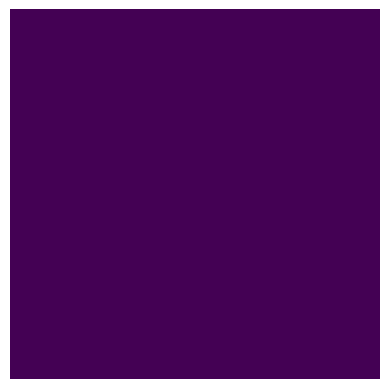

KeyboardInterrupt: Interrupted by user

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from transformers import pipeline
from tensorflow.keras.models import load_model

# Load GPT-2 for text generation
text_generator = pipeline("text-generation", model="gpt2")

# Load pre-trained GAN model for image generation
gan_model = load_model("gan_model.h5")  # Replace with the path to your GAN model file

def generate_story_with_images(prompt, ending, num_characters):
    # Generate text using GPT-2
    generated_text = text_generator(prompt, max_length=100, num_return_sequences=1)[0]['generated_text']

    # Generate image using GAN model
    generated_image = generate_image_with_gan(prompt)

    # Add ending prompt and character names to the story
    character_names = [input(f"Enter name for character {i + 1}: ") for i in range(num_characters)]
    characters_section = "\n".join([f"{name}: " for name in character_names])
    full_story = f"{characters_section}{generated_text} {ending}"

    return full_story, generated_image

def generate_image_with_gan(prompt):
    # Generate image using GAN model
    latent_dim = 100
    generated_image = gan_model.predict(np.random.normal(0, 1, (1, latent_dim)))[0]

    # Convert image array to PIL image
    generated_image = Image.fromarray((generated_image * 255).astype(np.uint8))

    return generated_image

def main():
    print("Welcome to Generative Storytelling AI!")
    print("Enter your prompt to start generating a story, or type 'exit' to quit.")

    while True:
        prompt = input("Enter your prompt: ")
        if prompt.lower() == 'exit':
            print("Exiting...")
            break

        ending = input("Enter the ending of the story: ")
        num_characters = int(input("Enter the number of characters: "))

        generated_story, generated_image = generate_story_with_images(prompt, ending, num_characters)

        print("\nGenerated Story:")
        print(generated_story)

        print("\nGenerated Image:")
        plt.imshow(generated_image)  # Display the image
        plt.axis('off')  # Hide the axis
        plt.show()  # Show the plot

if __name__ == "__main__":
    main()


Welcome to Interactive Storytelling!
Enter your prompt to start generating a story, or type 'exit' to quit.


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1/1 [==============================] - 0s 90ms/step

Generated Story:
knig: 
queen: 
knight: once upon a time there live a knight who was known for his cunning, courage and good judgment." ~Frozehil, The Dark Elf Warrior

Giants and Elves Are One. Humans are very similar to elves but with the appearance of giants. They often eat and trade with giants in their own lands, while on some land elves are often the last to stop humans from running away from their borders or using their magic to build their own castles.

Giants are usually seen in the southern regions of the galaxy, with large dwarven empires throughout the Outer Rim.

Giants, like elves, are a kind of people, a tribe which live very closely together.

Dwarves and Orcs

Giant-like humans are also found in the ancient world. They fight on land with human tribes, though they usually fight like elves. Giant orcs can be found in every nation of the galaxy, though they are generally considered too dangerous or brutish.

Hordemen ar

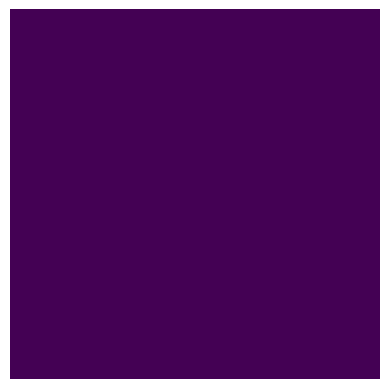

In [ ]:
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model

# Load the text generation pipeline with GPT-2 model
generator = pipeline("text-generation", model="gpt2")

# Load the GAN model
gan_model = load_model("gan_model.h5")

def generate_story(prompt, character_names, ending, max_length=400):
    # Generate text based on input prompt
    story = generator(prompt, max_length=max_length, num_return_sequences=1)[0]['generated_text']

    # Combine character names with story
    characters_section = "\n".join([f"{name}: " for name in character_names])
    full_story = f"{characters_section}{story} {ending}"

    return full_story

def generate_image_with_gan(prompt):
    # Generate image using GAN model
    latent_dim = 100
    generated_image = gan_model.predict(np.random.normal(0, 1, (1, latent_dim)))[0]

    # Convert image array to PIL image
    generated_image = Image.fromarray((generated_image * 255).astype(np.uint8))

    return generated_image

def main():
    print("Welcome to Interactive Storytelling!")
    print("Enter your prompt to start generating a story, or type 'exit' to quit.")

    while True:
        prompt = input("Enter your prompt: ")

        if prompt.lower() == 'exit':
            print("Exiting...")
            break

        num_characters = int(input("Enter the number of characters: "))
        character_names = []
        for i in range(num_characters):
            name = input(f"Enter name for character {i + 1}: ")
            character_names.append(name)

        ending = input("Enter the ending of the story: ")

        # Generate and display the story
        full_story = generate_story(prompt, character_names, ending)
        generated_image = generate_image_with_gan(prompt)

        print("\nGenerated Story:")
        print(full_story)

        print("\nGenerated Image:")
        plt.imshow(generated_image)
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    main()
